In [3]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("DistanceMatrix")

AxesSubplot(0.125,0.125;0.62x0.755)


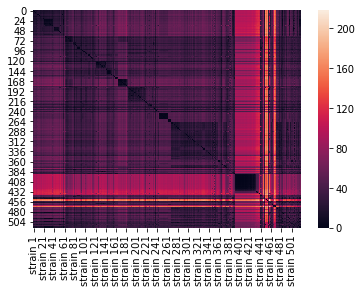

In [5]:
import seaborn as sns
print(sns.heatmap(df))

#This is the heat map I was talking about before

In [43]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [44]:
metadata_df.head()

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,1_0015_PF,zika,KX447511,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447511,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
1,1_0016_PF,zika,KX447520,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447520,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
2,1_0030_PF,zika,KX447515,2013-11-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447515,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
3,1_0035_PF,zika,KX447514,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447514,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
4,1_0038_PF,zika,KX447517,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447517,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507


In [45]:
metadata_df.shape

(745, 15)

In [46]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [47]:
strains_df.shape

(519, 1)

In [48]:
metadata_df.shape

(745, 15)

In [72]:
strains_df.head()

,strain
0,DOM/2016/MA_WGS16_024
1,DOM/2016/BB_0180
2,DOM/2016/BB_0115
3,DOM/2016/BB_0208
4,DOM/2016/MA_WGS16_007


In [50]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [59]:
result_strains_df = result_strains[['strain','region','country']]

In [52]:
np.setdiff1d(strains_df['strain'].unique(),metadata_df['strain'].unique())

array([], dtype=object)

In [53]:
metadata_df['strain'].unique().shape

(745,)

In [54]:
#Generate condensed matrix for use with linkage call (or to create the clusters). Condensed matrix is one of the forms you can pass
#(There are multiple, but this is easiest for using a distance matrix).
matrix_size = len(matrixOfNum)
matrix_of_num = np.array(matrixOfNum)

#get indicies of upper triangle of matrix
iu = np.triu_indices(matrix_size,1)
matrix_ut = matrix_of_num[iu]
Z = linkage(matrix_ut, 'ward')

In [55]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(matrix_of_num))
#c gives you a measure of cleanly you can divide the data into clusters. 1.0 means you can perfectly divide them. For zika, the number is in the upper 70s, so it's not hard to cluster the data. 
#With recombinant viruses/bacteria, this number will probably be lower. The C function is built into scipy.
print(c)


0.7731577466854826


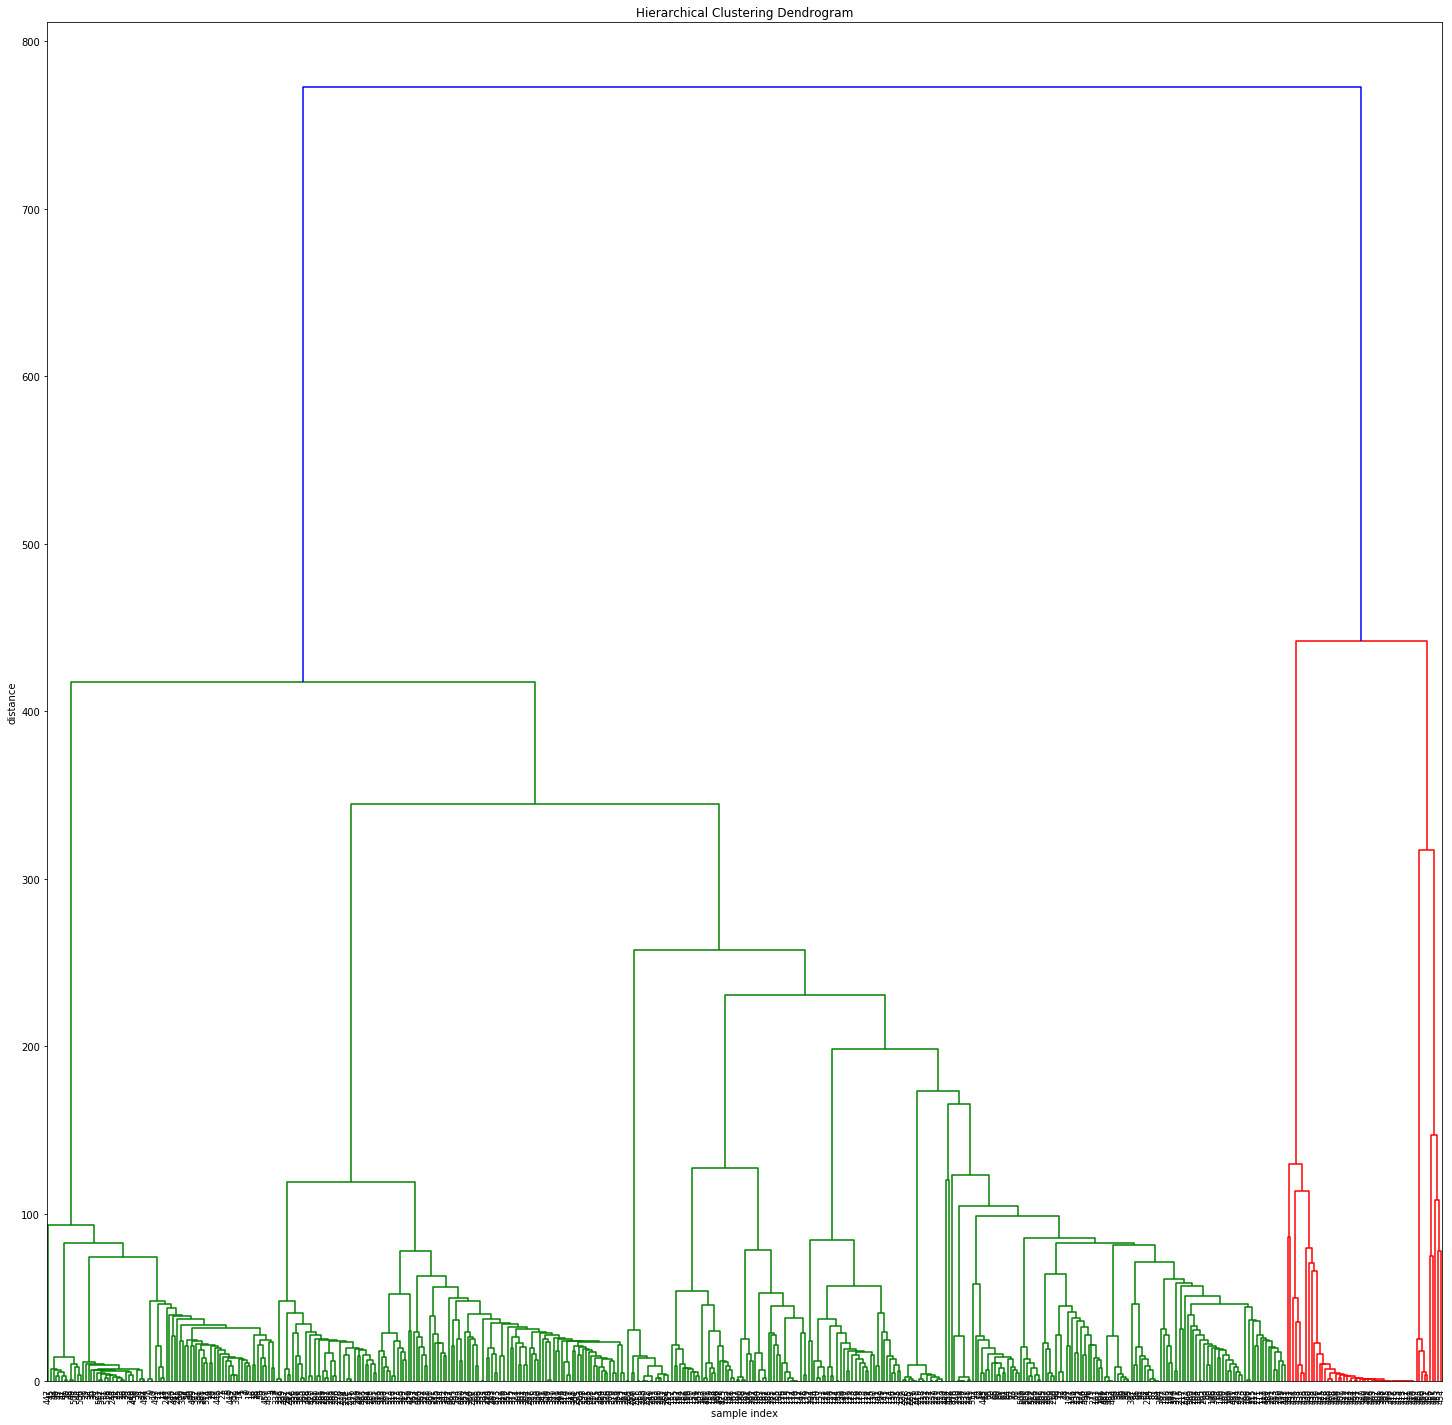

In [56]:
#Here we plot the dendrogram of the 519 strains
# calculate full dendrogram
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index') #they are hard to read, so the other dendogram is probably more helpful
plt.ylabel('distance') #distance being hamming distance
dendrogram( #this is built into sci py
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [61]:
result_strains_df.head()

,strain,region,country
0,DOM/2016/MA_WGS16_024,north_america,dominican_republic
1,DOM/2016/BB_0180,north_america,dominican_republic
2,DOM/2016/BB_0115,north_america,dominican_republic
3,DOM/2016/BB_0208,north_america,dominican_republic
4,DOM/2016/MA_WGS16_007,north_america,dominican_republic


33


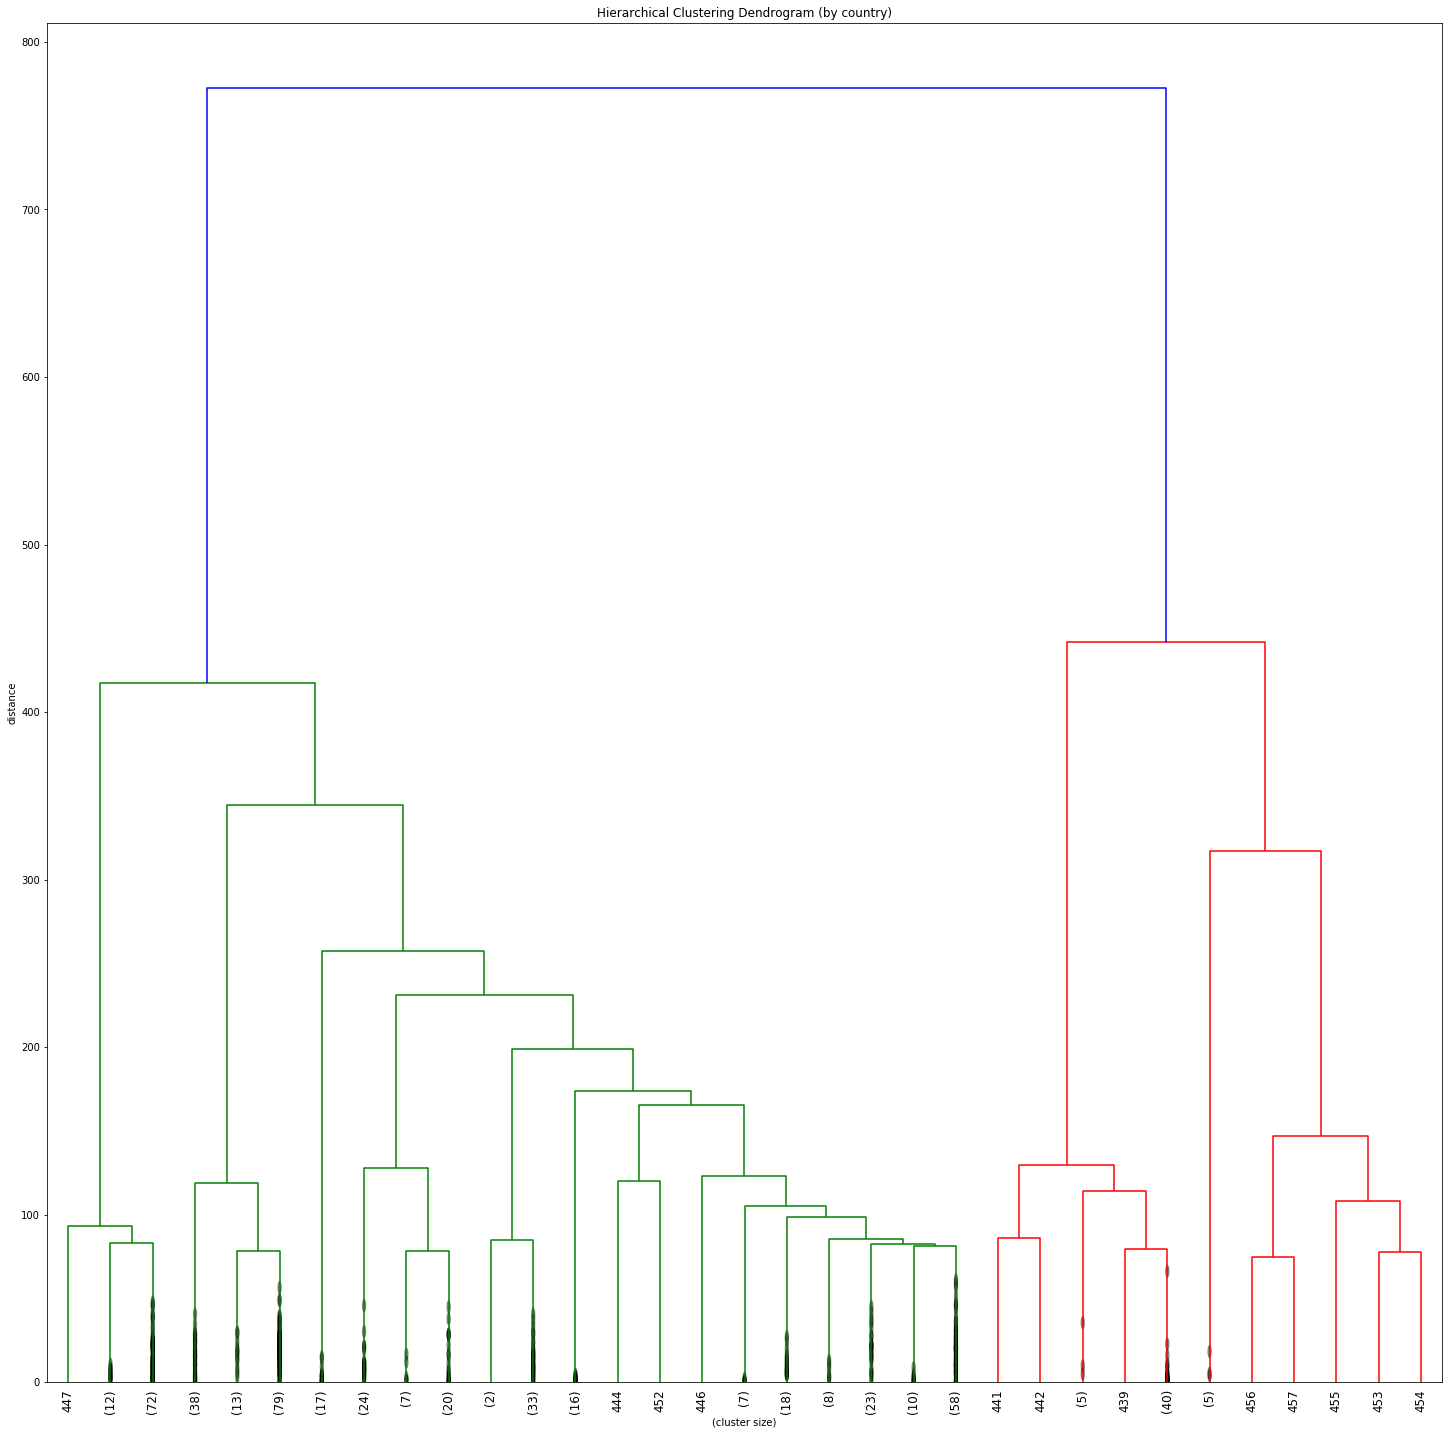

In [62]:
#Here I plot the dendogram assuming there are 45 clusters corresponding to each country. It "clumps" the countries that fit on a cluster together
#I assume all strains originating from a country will be similar -- using the dendogram will allow the user to see how "pure" or "impure" the country based cluster is.
#we could easily do this for region if you think thats useful
#fix this section (there may be less countries than 45 after merging)
countries = set(result_strains_df['country'].values)
print(len(countries))

plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram (by country)')
plt.xlabel('(cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=len(countries),  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [63]:
#This allows me to see which strains were put into what clusters. 
#It allows allows me to see which countries have more similar strain circulating versus places where the strains are very dissimilar.
from scipy.cluster.hierarchy import fcluster
cluster_indices = fcluster(Z, len(countries), criterion='maxclust')

#add the cluster index to the strain dataframe
dataa["cluster_index"] = cluster_indices
dataa["strain_index"] = list(range(len(matrixOfNum)))
#check if the counts line up with dendogram and they do!
#Build list of lists of 45 clusters
cluster_ids = set(cluster_indices) #cluster ids is now a list of the cluster indices
result = []
for i in cluster_ids:
    lst = list(dataa[dataa.cluster_index == i]['strain_index'].values)#looking for where the indexes of the cluster are the same as the cluster index of the strain
    print("Cluster: {}, Strains: {}, Number: {}".format(i,lst, len(lst)))#prints out the cluster name, and strains, and how many strains are in that cluster
result


Cluster: 1, Strains: [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 506, 508], Number: 12
Cluster: 2, Strains: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 51, 52, 53, 54, 55, 56, 57, 58, 244, 245, 246, 247, 248, 381, 382, 388, 389, 390, 448, 449, 450, 458, 481, 487, 493, 494, 499, 502, 514, 517, 518], Number: 72
Cluster: 3, Strains: [447], Number: 1
Cluster: 4, Strains: [275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 334, 335, 336, 337, 338, 339, 355, 356, 360, 361, 365, 378, 468, 469, 470, 471, 492, 497, 507, 511], Number: 38
Cluster: 5, Strains: [307, 308, 309, 312, 313, 315, 316, 317, 359, 373, 479, 496, 513], Number: 13
Cluster: 6, Strains: [293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 310, 311, 314, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 340, 341, 342, 343, 344, 345, 346

[]

In [64]:
principalDf = pd.DataFrame(Z)

In [66]:
#merging my final dataframe with their regions and strain names
#fix  this section with the new code from above
import pandas as pd

finalDf = pd.concat([principalDf, result_strains_df[['region','country','strain']]], axis = 1)
finalDf.columns = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4','region', 'country', 'strain']

In [67]:
finalDf

,cluster 1,cluster 2,cluster 3,cluster 4,region,country,strain
0,248.0,458.0,0.000000,2.0,north_america,dominican_republic,DOM/2016/MA_WGS16_024
1,22.0,25.0,0.000000,2.0,north_america,dominican_republic,DOM/2016/BB_0180
2,32.0,494.0,0.000000,2.0,north_america,dominican_republic,DOM/2016/BB_0115
3,83.0,84.0,0.000000,2.0,north_america,dominican_republic,DOM/2016/BB_0208
4,87.0,522.0,0.000000,3.0,north_america,dominican_republic,DOM/2016/MA_WGS16_007
5,9.0,10.0,0.000000,2.0,japan_korea,japan,Yokohama/1/2016
6,483.0,484.0,0.000000,2.0,north_america,dominican_republic,Dominican_Rep_Rus_3ALT_2016
7,485.0,525.0,0.000000,3.0,north_america,dominican_republic,Dominican_Rep_Rus_4MRG_2016
8,170.0,172.0,0.000000,2.0,north_america,dominican_republic,Dominican_Rep_Rus_5RMN_2016
9,104.0,105.0,0.000000,2.0,north_america,dominican_republic,Dominican_Rep_Rus_7EGR_2016


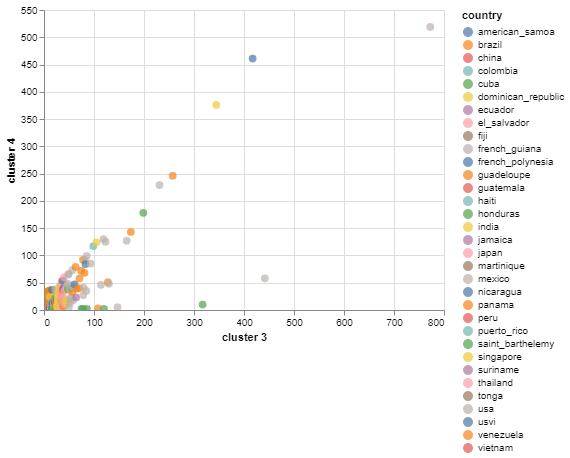

In [68]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    color='country',
    tooltip=['strain', 'country']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

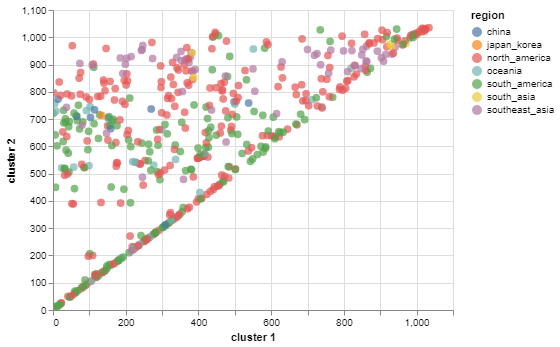

In [69]:
import altair as alt
#read these cluster ACROSS (horizontallu) -- im pretty sure cluster 3 and cluster 4 are more useful to see clustering
alt.Chart(finalDf).mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    color='region',
    tooltip=['strain', 'country']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

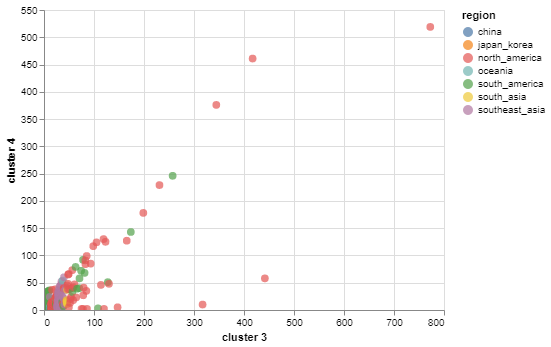

In [70]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    color='region',
    tooltip=['strain', 'region']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

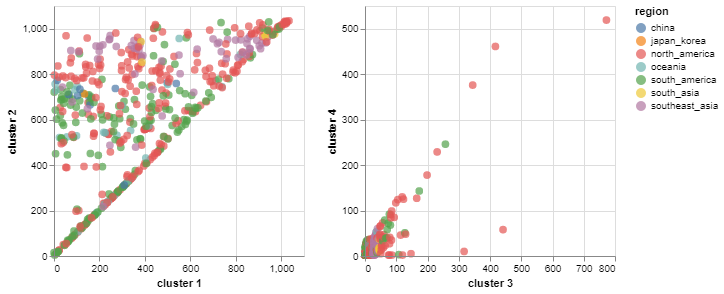

In [71]:
import altair as alt


brush = alt.selection(type='interval', resolve='global')
#link the charts
pc1 = alt.Chart(finalDf).mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

pc34 = alt.Chart(finalDf).mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

   
pc1.encode(x='cluster 1') | pc34.encode(x='cluster 3')

In [74]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [75]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [76]:
tree = json_to_tree(json_tree_handle)

In [77]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [78]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [79]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [80]:
node_df = pd.DataFrame(node_data)

In [81]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [82]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [83]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [84]:
node_df.shape

(517, 7)

In [85]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [86]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [87]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [88]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [89]:
merged_df.shape

(516, 12)

# Linking the Tree with the two other PCA Plots

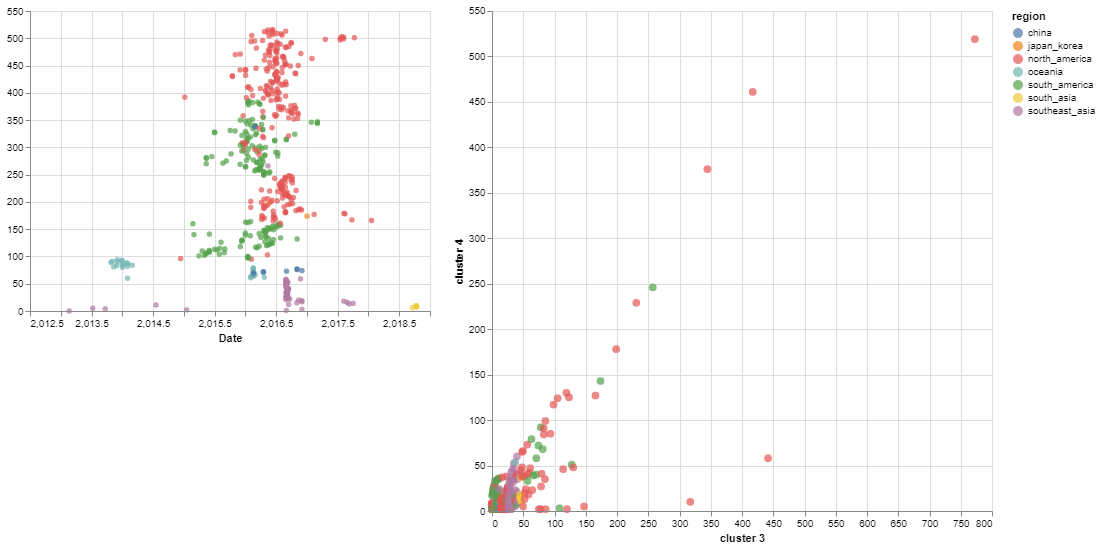

In [96]:
import altair as alt
base = alt.Chart(merged_df)
brush = alt.selection(type='interval', resolve='global')
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush)


pc1 = base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

pc34 = base.mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=500,
    height=500
)


tree_name|pc34
#pc1.encode(x='principal component 1') | pc34.encode(x='principal component 3') #link the tree to this one as well